In [1]:
import numpy as np
import pandas as pd
import torch
import torch_geometric as pyg
import networkx as nx
from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx
from torch_geometric.data import DataLoader
import matplotlib.pyplot as plt

/home/diego/miniconda3/envs/ter_gnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
train_ds = ZINC(root='./data/zinc/', subset=True, split='train')

Total number of graphs in the dataset:

In [26]:
print(f'Number of graphs: {len(train_ds)}')

Number of graphs: 10000


In [4]:
def plot_graph(graph):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    nx_graph = to_networkx(graph, to_undirected=True)
    colors = graph.x.flatten().tolist()
    nx.draw_networkx(nx_graph, node_color=colors, cmap='Set1', ax=ax)
    ax.set_title('Target: {:.4f}'.format(graph.y.item()))

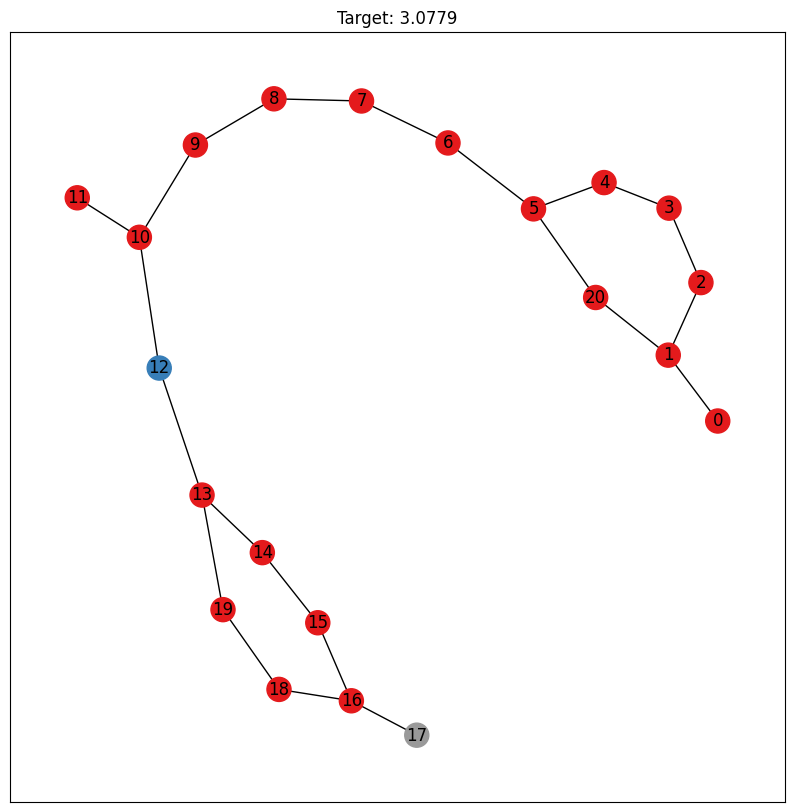

In [5]:
plot_graph(train_ds[123])

In [6]:
targets = np.array([graph.y.item() for graph in train_ds])

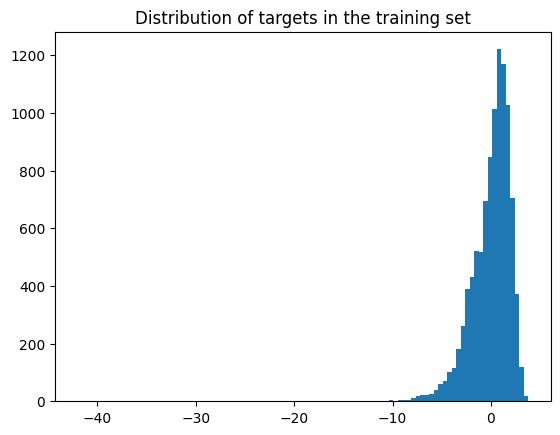

In [7]:
plt.hist(targets, bins=100);
plt.title('Distribution of targets in the training set');

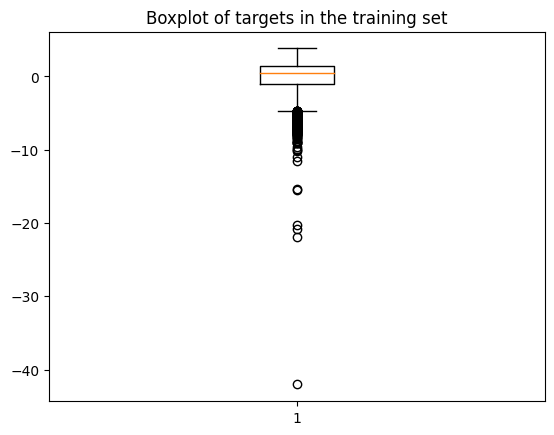

In [8]:
plt.boxplot(targets);
plt.title('Boxplot of targets in the training set');

In [11]:
nodes = np.array([graph.x.shape[0] for graph in train_ds])

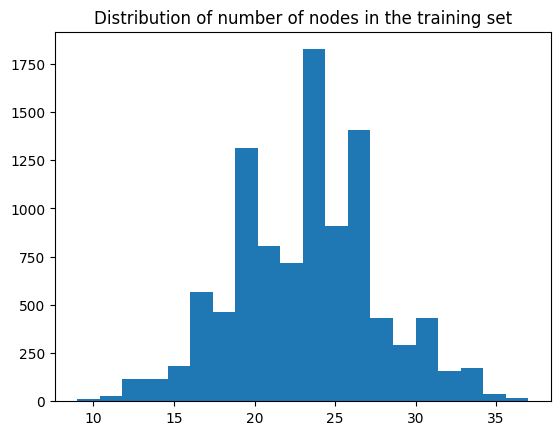

In [12]:
plt.hist(nodes, bins=20);
plt.title('Distribution of number of nodes in the training set');

In [36]:
pd.Series(nodes).agg(['min', 'median', 'max'])

min        9.0
median    23.0
max       37.0
dtype: float64

In [13]:
atoms = pd.Series([graph.x.flatten().tolist() for graph in train_ds])

In [15]:
atom_counts = atoms.apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int)

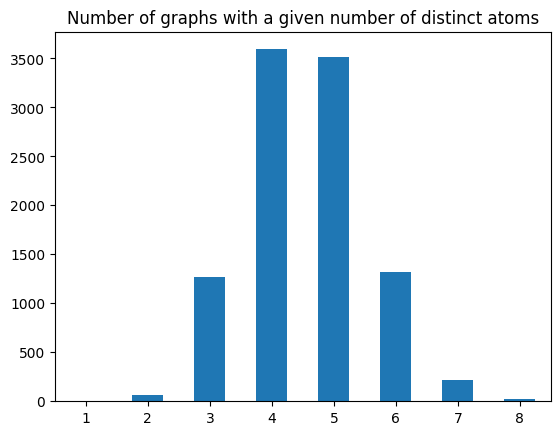

In [17]:
(atom_counts>0).sum(axis=1).value_counts().sort_index().plot.bar()
plt.xticks(rotation=0);
plt.title('Number of graphs with a given number of distinct atoms');

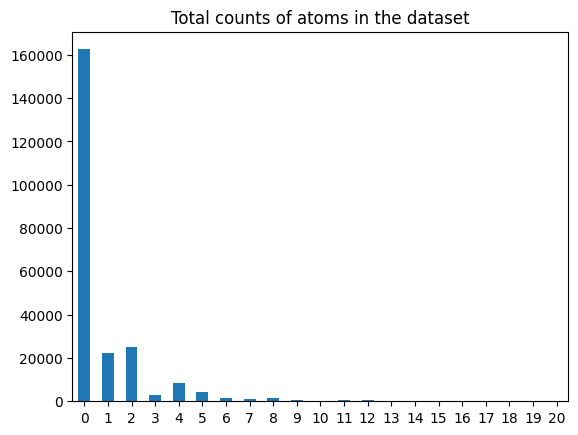

In [18]:
atom_counts.sum(axis=0).sort_index().plot.bar()
plt.xticks(rotation=0);
plt.title('Total counts of atoms in the dataset');

In [37]:
edges = np.array([graph.edge_index.shape[1] for graph in train_ds])

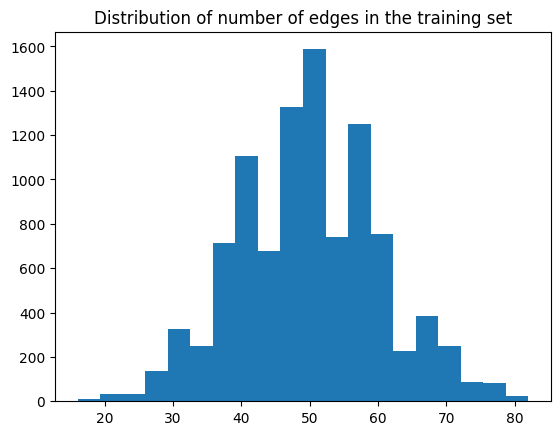

In [38]:
plt.hist(edges, bins=20);
plt.title('Distribution of number of edges in the training set');

In [39]:
pd.Series(edges).agg(['min', 'median', 'max'])

min       16.0
median    50.0
max       82.0
dtype: float64

In [28]:
edges = pd.Series([graph.edge_attr.flatten().tolist() for graph in train_ds])

In [30]:
edge_counts = edges.apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int)

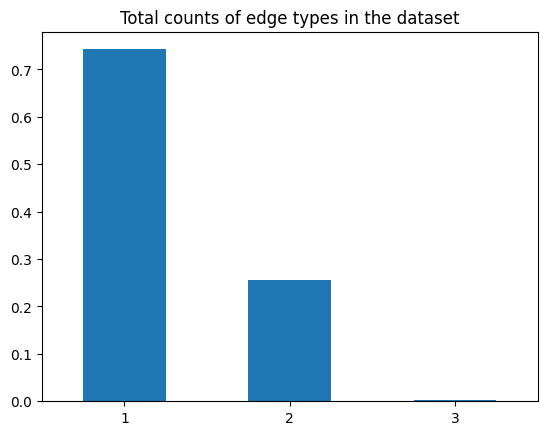

In [41]:
(edge_counts.sum(axis=0)/edge_counts.sum().sum()).plot.bar()
plt.xticks(rotation=0);
plt.title('Total counts of edge types in the dataset');